In [1]:
import os
import requests
import pandas as pd
import yfinance as yf
from dotenv import load_dotenv
import numpy as np
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
%matplotlib inline

In [2]:
load_dotenv()

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")


api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [3]:
data = yf.download("AGG VTI GLD BTC-USD", start="2015-01-01",
                    end="2021-12-31", group_by='tickers')

[*********************100%***********************]  4 of 4 completed


In [4]:
data.dropna(inplace = True)
data

BTC-USD                                            \
                    Open          High           Low         Close   
Date                                                                 
2015-01-02    314.079010    315.838989    313.565002    315.032013   
2015-01-05    265.084015    278.341003    265.084015    274.473999   
2015-01-06    274.610992    287.553009    272.696014    286.188995   
2015-01-07    286.076996    298.753998    283.079010    294.337006   
2015-01-08    294.135010    294.135010    282.174988    283.348999   
...                  ...           ...           ...           ...   
2021-12-23  48626.343750  51332.339844  48065.835938  50784.539062   
2021-12-27  50802.609375  51956.328125  50499.468750  50640.417969   
2021-12-28  50679.859375  50679.859375  47414.210938  47588.855469   
2021-12-29  47623.871094  48119.742188  46201.496094  46444.710938   
2021-12-30  46490.605469  47879.964844  46060.312500  47178.125000   

                                              GLD                          \
               Adj Close       Volume        Open        High         Low   
Date                                                                        
2015-01-02    315.032013      7860650  112.489998  114.800003  112.320000   
2015-01-05    274.473999     43962800  114.779999  116.000000  114.730003   
2015-01-06    286.188995     23245700  116.220001  117.500000  115.800003   
2015-01-07    294.337006     24866800  116.470001  116.879997  116.169998   
2015-01-08    283.348999     19982500  116.449997  116.870003  115.849998   
...                  ...          ...         ...         ...         ...   
2021-12-23  50784.539062  28223878108  168.690002  169.160004  168.009995   
2021-12-27  50640.417969  24324345758  168.960007  169.419998  168.779999   
2021-12-28  47588.855469  33430376883  169.330002  169.649994  168.619995   
2021-12-29  46444.710938  30049226299  167.360001  168.690002  167.279999   
2021-12-30  47178.125000  26686491018  168.429993  169.809998  168.369995   

                        ...         AGG                                     \
                 Close  ...         Low       Close   Adj Close     Volume   
Date                    ...                                                  
2015-01-02  114.080002  ...  110.180000  110.430000   93.438240  2090200.0   
2015-01-05  115.800003  ...  110.480003  110.669998   93.641312  3446200.0   
2015-01-06  117.120003  ...  110.889999  110.949997   93.878189  3688100.0   
2015-01-07  116.430000  ...  110.739998  110.930000   93.861267  3984400.0   
2015-01-08  115.940002  ...  110.629997  110.760002   93.717430  2212200.0   
...                ...  ...         ...         ...         ...        ...   
2021-12-23  168.970001  ...  114.070000  114.199997  114.199997  5506700.0   
2021-12-27  169.369995  ...  114.129997  114.260002  114.260002  5436800.0   
2021-12-28  168.639999  ...  114.169998  114.209999  114.209999  5253800.0   
2021-12-29  168.589996  ...  113.809998  113.870003  113.870003  5933800.0   
2021-12-30  169.800003  ...  113.830002  114.120003  114.120003  5455400.0   

                   VTI                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2015-01-02  106.489998  106.720001  105.269997  105.919998   93.295891   
2015-01-05  105.349998  105.550003  103.860001  104.099998   91.692802   
2015-01-06  104.400002  104.500000  102.510002  103.080002   90.794365   
2015-01-07  104.089996  104.449997  103.550003  104.309998   91.877785   
2015-01-08  105.209999  106.239998  105.110001  106.150002   93.498474   
...                ...         ...         ...         ...         ...   
2021-12-23  239.869995  241.360001  239.500000  240.669998  239.811005   
2021-12-27  240.479996  242.960007  240.339996  242.960007  242.960007   
2021-12-28  243.059998  243.779999  242.039993  24

In [5]:
# data["AGG"]["close"] = data["AGG"]["Close"]
# data["VTI"]["close"] = data["VTI"]["Close"]
# data["BTC-USD"]["close"] = data["BTC-USD"]["Close"]
# data["GLD"]["close"] = data["GLD"]["Close"]

In [6]:
data= data.rename(columns=str.lower)
data

btc-usd                                            \
                    open          high           low         close   
Date                                                                 
2015-01-02    314.079010    315.838989    313.565002    315.032013   
2015-01-05    265.084015    278.341003    265.084015    274.473999   
2015-01-06    274.610992    287.553009    272.696014    286.188995   
2015-01-07    286.076996    298.753998    283.079010    294.337006   
2015-01-08    294.135010    294.135010    282.174988    283.348999   
...                  ...           ...           ...           ...   
2021-12-23  48626.343750  51332.339844  48065.835938  50784.539062   
2021-12-27  50802.609375  51956.328125  50499.468750  50640.417969   
2021-12-28  50679.859375  50679.859375  47414.210938  47588.855469   
2021-12-29  47623.871094  48119.742188  46201.496094  46444.710938   
2021-12-30  46490.605469  47879.964844  46060.312500  47178.125000   

                                              gld                          \
               adj close       volume        open        high         low   
Date                                                                        
2015-01-02    315.032013      7860650  112.489998  114.800003  112.320000   
2015-01-05    274.473999     43962800  114.779999  116.000000  114.730003   
2015-01-06    286.188995     23245700  116.220001  117.500000  115.800003   
2015-01-07    294.337006     24866800  116.470001  116.879997  116.169998   
2015-01-08    283.348999     19982500  116.449997  116.870003  115.849998   
...                  ...          ...         ...         ...         ...   
2021-12-23  50784.539062  28223878108  168.690002  169.160004  168.009995   
2021-12-27  50640.417969  24324345758  168.960007  169.419998  168.779999   
2021-12-28  47588.855469  33430376883  169.330002  169.649994  168.619995   
2021-12-29  46444.710938  30049226299  167.360001  168.690002  167.279999   
2021-12-30  47178.125000  26686491018  168.429993  169.809998  168.369995   

                        ...         agg                                     \
                 close  ...         low       close   adj close     volume   
Date                    ...                                                  
2015-01-02  114.080002  ...  110.180000  110.430000   93.438240  2090200.0   
2015-01-05  115.800003  ...  110.480003  110.669998   93.641312  3446200.0   
2015-01-06  117.120003  ...  110.889999  110.949997   93.878189  3688100.0   
2015-01-07  116.430000  ...  110.739998  110.930000   93.861267  3984400.0   
2015-01-08  115.940002  ...  110.629997  110.760002   93.717430  2212200.0   
...                ...  ...         ...         ...         ...        ...   
2021-12-23  168.970001  ...  114.070000  114.199997  114.199997  5506700.0   
2021-12-27  169.369995  ...  114.129997  114.260002  114.260002  5436800.0   
2021-12-28  168.639999  ...  114.169998  114.209999  114.209999  5253800.0   
2021-12-29  168.589996  ...  113.809998  113.870003  113.870003  5933800.0   
2021-12-30  169.800003  ...  113.830002  114.120003  114.120003  5455400.0   

                   vti                                                  \
                  open        high         low       close   adj close   
Date                                                                     
2015-01-02  106.489998  106.720001  105.269997  105.919998   93.295891   
2015-01-05  105.349998  105.550003  103.860001  104.099998   91.692802   
2015-01-06  104.400002  104.500000  102.510002  103.080002   90.794365   
2015-01-07  104.089996  104.449997  103.550003  104.309998   91.877785   
2015-01-08  105.209999  106.239998  105.110001  106.150002   93.498474   
...                ...         ...         ...         ...         ...   
2021-12-23  239.869995  241.360001  239.500000  240.669998  239.811005   
2021-12-27  240.479996  242.960007  240.339996  242.960007  242.960007   
2021-12-28  243.059998  243.779999  242.039993  24

Portfolio A Simulation

In [19]:
MC_portfolio_a_early_career = MCSimulation(portfolio_data = data, weights = [.85,.1,.05, 0], num_simulation = 1000, num_trading_days = 252*10)

In [8]:
# MC_portfolio_a_mid_career = MCSimulation(portfolio_data = data, weights = [.75,.2,.05, 0], num_simulation = 100, num_trading_days = 252*10)
# MC_portfolio_a_pre_retiremenet = MCSimulation(portfolio_data = data, weights = [.65,.3,.05, 0], num_simulation = 100, num_trading_days = 252*10)

In [9]:
# tickers = ["AGG", "VTI" , "GLD" ]


# timeframe = "1D"


# start_date = pd.Timestamp("2017-01-01", tz="America/New_York").isoformat()
# end_date = pd.Timestamp("2021-12-31", tz="America/New_York").isoformat()


# ticker_data = api.get_barset(
#     tickers,
#     timeframe,
#     start=start_date,
#     end=end_date,
#     limit=1000,
# ).df

# ticker_data = ticker_data.copy()
# ticker_data.index.tz_convert(None)

# ticker_data.tail()


# btc = yf.download('BTC-USD', '2017-01-01', '2021-12-31')
# day = np.arange(1, len(btc) + 1)
# btc['day'] = day
# btc.drop(columns=['Adj Close', 'Volume'], inplace = True)
# btc = btc[[ 'Open', 'High', 'Low', 'Close']]
# btc.head()

In [10]:
# btc = yf.download('BTC-USD', '2010-01-01', '2021-12-31')
# day = np.arange(1, len(btc) + 1)
# btc['day'] = day
# btc.drop(columns=['Adj Close', 'Volume'], inplace = True)
# btc = btc[[ 'Open', 'High', 'Low', 'Close']]
# btc.head()

In [11]:
# columns=[('BTC','Open'),('BTC','High'),('BTC','Low'),('BTC','Close')]
# btc.columns=pd.MultiIndex.from_tuples(columns)
# btc.head()

In [12]:
# pd.concat([ticker_data, btc], axis=1)
# ticker_data.head()

In [13]:
# MC_dist = MCSimulation(portfolio_data = ticker_data, weights = [.80,.15,.05], num_simulation = 100, num_trading_days = 252*30)

In [ ]:
MC_portfolio_a_early_career.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 100.


C:\Users\jakek\Downloads\Project_1_Team_2-ray_draft\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 200.


In [15]:
# MC_portfolio_a_mid_career.calc_cumulative_return()

In [16]:
# MC_portfolio_a_pre_retirement.calc_cumulative_return()

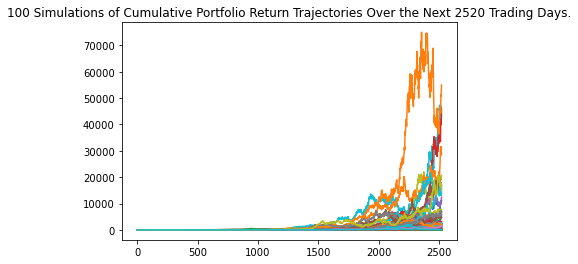

In [17]:
line_plot = MC_portfolio_a_early_career.plot_simulation()

In [18]:
summarize = MC_portfolio_a_early_career.summarize_cumulative_return()

print(summarize)

count             100.000000
mean             3918.300535
std              9183.677819
min                 5.551806
25%               216.535545
50%               777.522933
75%              2360.182710
max             54951.641717
95% CI Lower       17.046360
95% CI Upper    36655.598562
Name: 2520, dtype: float64
